# Data Mining: Association Rules and Lift Analysis
## Jessica Schmidt

# PART I: Research Question
## A1. Research Question for Market Basket Analysis
Can we uncover any associations/patterns between pairs of prescriptions in the provided medical prescription dataset via market basket analysis (MBA) to inform the institution regarding potential bundling options for future prescriptions? Additionally, in medical terms, bundling prescriptions could be useful in cases where the associated prescriptions all have the same indication (i.e., diabetes is an indication for insulin, etc.).

## A2. Goal of the Analysis
One goal of this market basket analysis is to determine what the top three assocation rules are according to the different Apriori algorithm association rule metrics (support, confidence, and lift).

# PART II: Market Basket Justification
## B1. How Market Basket Analyzes the Dataset and Expected Outcomes (sources: D212 Webinars and Turing)
Market basket analysis "is based on an association rule mining which is IF {}, THEN {} construct. Everything that is within the brackets is referred to as an itemset, which is some form of data. The process initiates from a data set of transactions. Every transaction depicts a group of products that are bought together by the customers and are often referred to as itemsets. These transactions are analyzed through the MBA to identify the rules of the association." (Turing) The rules of the association are support (measure of the number of occurrences), confidence (how likely an item will be purchased if another is purchased), and lift (ratio of confidence vs expected confidence - a measurement of popularity). In this case our purchases are instead prescriptions for the medical dataset and the transactions are the prescriptions of a single patient over two prior years.

The expected outcome of the analysis is that we will be able to determine which prescriptions are associated with one another: essentially, our "if, then" rules where if one prescription is prescribed, then another is also prescribed.

## B2. Example of Transactions in Dataset
As above in B1, an example of a transaction in the dataset is the prescriptions of a single patient over the prior two years. For example, the first row of prescriptions in the dataset has 20 prescriptions for a single patient: Amlodipine, albuterol aerosol, allopurinol, pantoprazole, lorazepam, omeprazole, mometasone, fluconazole, gabapentin, pravastatin, Cialis, losartan, metoprolol succinate XL, sulfamethoxazole, abilify, spironolactone, albuterol HFA, levofloxacin, promethazine, and glipizide. This visualized in the section below "Examining the dataset".

## B3. Assumption of Market Basket Analysis
An assumption of MBA is that "each entry in the dataset represents an independent transaction, where a member makes purchases on a specific date." (source: Medium)

# PART III: Data Preparation and Analysis
## C1. Transforming the Dataset for Analysis and Copy of Cleaned Dataset (source: D212 Webinars)
To transform the dataset in preparation for MBA, we must do the following:
1. Remove empty rows/columns
2. Create a list of lists
3. Convert the list via the TransactionEncoder to create a boolean array
4. Return the array to a dataframe
5. Display the items as columns
6. Identify and remove the empty column

In [1]:
# Importing the Relevant Packages
import pandas as pd
from pandas import DataFrame
import numpy as np

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Dataset
data = pd.read_csv('/Users/astro/Downloads/medical_market_basket.csv')

# Examining the Dataset
data.head(5)

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(15002, 20)

In [4]:
# Drop blank rows from dataset
data = data[data['Presc01'].notna()]
data.shape

(7501, 20)

In [5]:
# Convert df to list of lists
rows = []
for i in range (0, 7501):
    rows.append([str(data.values[i,j])
for j in range (0, 20)])

In [6]:
# List fed to TransactionEncoder
DE = TransactionEncoder()
array = DE.fit(rows).transform(rows)

# Return array to df
transaction = pd.DataFrame(array, columns = DE.columns_)

In [7]:
transaction

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,...,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
for col in transaction.columns:
    print(col)

Duloxetine
Premarin
Yaz
abilify
acetaminophen
actonel
albuterol HFA
albuterol aerosol
alendronate
allopurinol
alprazolam
amitriptyline
amlodipine
amoxicillin
amphetamine
amphetamine salt combo
amphetamine salt combo xr
atenolol
atorvastatin
azithromycin
benazepril
benicar
boniva
bupropion sr
carisoprodol
carvedilol
cefdinir
celebrex
celecoxib
cephalexin
cialis
ciprofloxacin
citalopram
clavulanate K+
clonazepam
clonidine HCI
clopidogrel
clotrimazole
codeine
crestor
cyclobenzaprine
cymbalta
dextroamphetamine XR
diazepam
diclofenac sodium
doxycycline hyclate
enalapril
escitalopram
esomeprazole
ezetimibe
fenofibrate
fexofenadine
finasteride
flovent hfa 110mcg inhaler
fluconozole
fluoxetine HCI
fluticasone
fluticasone nasal spray
folic acid
furosemide
gabapentin
glimepiride
glipizide
glyburide
hydrochlorothiazide
hydrocodone
hydrocortisone 2.5% cream
ibuprophen
isosorbide mononitrate
lansoprazole
lantus
levofloxacin
levothyroxine sodium
lisinopril
lorazepam
losartan
lovastatin
meloxicam
met

In [9]:
# Remove NAN column from dataset
cleaned_df = transaction.drop(['nan'], axis = 1)
cleaned_df.head(7505)

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,...,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
# Write cleaned dataset to csv
cleaned_df.to_csv('/Users/astro/Downloads/cleanedMBA_df.csv', index=False)
cleaned_df.columns

Index(['Duloxetine', 'Premarin', 'Yaz', 'abilify', 'acetaminophen', 'actonel',
       'albuterol HFA', 'albuterol aerosol', 'alendronate', 'allopurinol',
       ...
       'trazodone HCI', 'triamcinolone Ace topical', 'triamterene',
       'trimethoprim DS', 'valaciclovir', 'valsartan', 'venlafaxine XR',
       'verapamil SR', 'viagra', 'zolpidem'],
      dtype='object', length=119)

## C2. Code to Generate Association Rules with Apriori Algorithm (source: D212 Webinars)

In [11]:
data = pd.read_csv('/Users/astro/Downloads/cleanedMBA_df.csv')

data.head()

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,...,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
data.shape

(7501, 119)

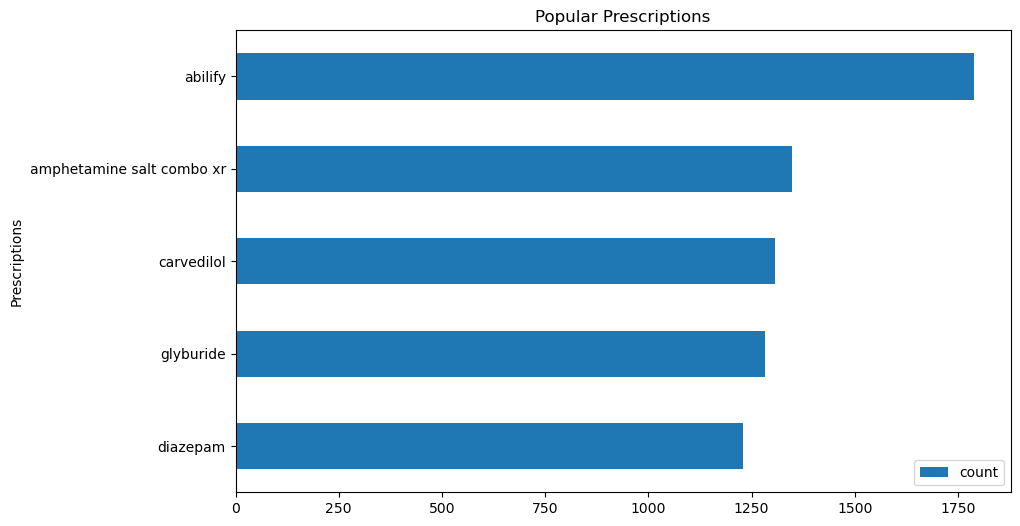

In [13]:
# 5 most popular prescriptions
count = data.loc[:,:].sum()
pop_item = count.sort_values(0, ascending = False).head(5)
pop_item = pop_item.to_frame()
pop_item = pop_item.reset_index()
pop_item = pop_item.rename(columns = {'index': 'Prescriptions', 0: 'count'})

# Visualization
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
ax = pop_item.plot.barh(x = 'Prescriptions', y = 'count')
plt.title('Popular Prescriptions')
plt.gca().invert_yaxis()

In [14]:
# Creating apriori object called rules
rules = apriori(data, min_support = 0.02, use_colnames = True)
rules.head(5)

,support,itemsets
0,0.046794,(Premarin)
1,0.238368,(abilify)
2,0.020397,(albuterol aerosol)
3,0.033329,(allopurinol)
4,0.079323,(alprazolam)


## C3. Values for the Support, Lift, and Confidence of the Association Rules Table (source: D212 Webinars)

In [15]:
# Creating Rules Table
rul_table = association_rules(rules, metric = 'lift', min_threshold = 1)
rul_table.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(abilify),(amlodipine),0.238368,0.071457,0.023597,0.098993,1.385352,0.006564,1.030562,0.365218
1,(amlodipine),(abilify),0.071457,0.238368,0.023597,0.330224,1.385352,0.006564,1.137144,0.299568
2,(abilify),(amphetamine salt combo),0.238368,0.068391,0.024397,0.102349,1.496530,0.008095,1.037830,0.435627
3,(amphetamine salt combo),(abilify),0.068391,0.238368,0.024397,0.356725,1.496530,0.008095,1.183991,0.356144
4,(amphetamine salt combo xr),(abilify),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
5,(abilify),(amphetamine salt combo xr),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
6,(abilify),(atorvastatin),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850,0.467950
7,(atorvastatin),(abilify),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,0.409465
8,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
9,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606


## C4. Top Three Relevant Rules Generated by Apriori Algorithm

In [16]:
# Sorting rules by metric
top_three_rules = rul_table.sort_values('confidence', ascending = False).head(3)
top_three_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
31,(metformin),(abilify),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
25,(glipizide),(abilify),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962,0.461536
28,(lisinopril),(abilify),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369


In [17]:
top_three_rules = rul_table.sort_values('lift', ascending = False).head(3)
top_three_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
75,(carvedilol),(lisinopril),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716,0.682343
74,(lisinopril),(carvedilol),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
73,(glipizide),(carvedilol),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186


In [18]:
top_three_rules = rul_table.sort_values('support', ascending = False).head(3)
top_three_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
9,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
19,(abilify),(diazepam),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197


In [19]:
sorted_rules = rul_table[(rul_table['lift'] > 0.08)]
sorted_rules.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(abilify),(amlodipine),0.238368,0.071457,0.023597,0.098993,1.385352,0.006564,1.030562,0.365218
1,(amlodipine),(abilify),0.071457,0.238368,0.023597,0.330224,1.385352,0.006564,1.137144,0.299568
2,(abilify),(amphetamine salt combo),0.238368,0.068391,0.024397,0.102349,1.496530,0.008095,1.037830,0.435627


In [20]:
top_three_rules = rul_table[(rul_table['lift'] > 1.9) & (rul_table['support'] > 0.02) & (rul_table['confidence'] > 0.3)].sort_values(by=['lift'], ascending= False)
top_three_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
74,(lisinopril),(carvedilol),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
73,(glipizide),(carvedilol),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186
31,(metformin),(abilify),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221


# PART IV: Data Summary and Implications
## D1. Summary of the Significance of Support, Lift, and Confidence (source: The Data School)
Given the results of the analysis in part C, we can see that the top three overall rules, where lift > 1.9, support > 0.02, and confidence > 0.3 (as sorted by lift), are as follows:

- Support: "In a list of transactions, how many transactions contain item (a). It is the probability of an item occuring, or P(a)." (Source: The Data School)

- Confidence: "Out of Transactions that contain item (a), how many also contain (b). The bigger the overlap, the greater the confidence we have that people who are buying (a) are also buying (b)." (Source: The Data School)

- Lift: "Ratio between confidence of (a) and support (b)." In other words, P(a&b)/P(a)P(b). (Source: The Data School)

"If Lisinopril, then Carvedilol": In other words, if someone has a prescription for Lisinopril, then they will also have a prescription for Carvedilol. Furthermore, based on the definitions above, we can confirm this association has support of 3.9% (or 3.9% of the 7501 transactions contain Lisinopril and Carvedilol), lift of 2.29 (meaning there is a positive ratio between the confidence and support of the association), and confidence of nearly 40% (meaning that there is nearly 40% confidence that someone being prescribed Lisinopril will also be prescribed Carvedilol).

"If Glipizide, then Carvedilol": In other words, if someone has a prescription for Glipizide, then they will also have a prescription for Carvedilol. Furthermore, based on the definitions above, we can confirm that this association has support of 2.3% (or 2.3% of the 7501 transactions contain Glipizide and Carvedilol), lift of 2 (meaning there is a positive ratio between the confidence and support of the assocation), and confidence of 35% (meaning that there is 35% confidence that someone being prescribed Glipizide will also be prescribed Carvedilol).

"If Metformin, then Abilify": In other words, if someone has a prescription for Metformin, then they will also have a prescription for Abilify. Furthermore, based on the definitions above, we can confirm that this association has support of 2.4% (or 2.4% of the 7501 transactions contain Metformin and Abilify), lift of 1.91 (meaning there is a positive ratio between confidence and support of the association), and confidence of 46% (meaning that there is 46% confidence that someone being prescribed Metformin will also be prescribed Abilify).

## D2. Discussion of Practical Significance of Findings
Given that the top three results where lift > 1.9, support > 0.02, and confidence > 0.3 (as sorted by lift), we can see that the overall top three associations are "if Lisinopril, then Carvedilol", "if Glipizide, then Carvedilol", and "if Metformin, then Abilify".

These prescriptions have the following indications (source: Mayo Clinic):
- Lisinopril: High blood pressure and heart failure
- Carvedilol: High blood pressure
- Glipizide: Type 2 diabetes
- Metformin: Type 2 diabetes and gestational diabetes
- Abilify: Mental health conditions (like schizoprenia, bipolar, ASD, and Tourettes)

With this information, we can see that the prescriptions have similar indications and it makes sense for them to be prescribed together. Addtionally, with further investigation, the following uses were found based on the associated rules:
- Lisinopril and Carvedilol: both are to treat high blood pressure.
- Glipizide and Carvedilol: one of the causes/risk factors of type 2 diabetes is being overweight, which also happens to be a cause/risk factor of high blood pressure.
- Metformin and Abilify: Abilify can cause weight gain and Metformin can potentially undo said weight gain (and can also treat type 2 diabetes which can result from being overweight).

## D3. Recommended Course of Action for A1 from D1
Based on the findings recorded in D1, the discussion of said findings in D2, and according to the research question from A1, we have indeed uncovered associations between prescriptions which can be used to inform future bundling of prescriptions. These potential bundles of prescriptions that are associated with one another and have the same indications/uses are Lisinopril and Carvedilol to treat high blood pressure, Glipizide and Carvedilol to treat potential symptoms of being overweight, and Metformin and Abilify where Abilify causes weight gain and Metformin can treat it. In essence, I recommend that these combinations of prescriptions be bundled together to treat their respective indications for future patients if deemed appropriate by a licensed medical provider.
